In [1]:
from CustomDataset.ShipDataset import ShipDataset
import torchvision
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ContrastiveTransformations(object):
    
    def __init__(self, base_transforms, n_views=2):
        self.base_transforms = base_transforms
        self.n_views = n_views
        
    def __call__(self, x):
        return [self.base_transforms(x) for i in range(self.n_views)]
contrast_transforms = transforms.Compose([transforms.RandomHorizontalFlip(), # 1
                                          transforms.RandomResizedCrop(size=96), # 2
                                          transforms.RandomApply([                  # 3
                                              transforms.ColorJitter(brightness=0.5, 
                                                                     contrast=0.5, 
                                                                     saturation=0.5, 
                                                                     hue=0.1)
                                          ], p=0.8),
                                          transforms.RandomGrayscale(p=0.2), # 4
                                          transforms.GaussianBlur(kernel_size=9), # 5
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5,), (0.5,))
                                         ])

ship_data = ShipDataset(root="data", split="train+unlabeled", l_img_pc=2, ul_img_pc=5,
    transform=ContrastiveTransformations(contrast_transforms, n_views=2))


+ ShipDataset() initialized


+ __getitem__() -> data/ship_data/train/ContainerShip/2855161.jpg
+ Transforming image


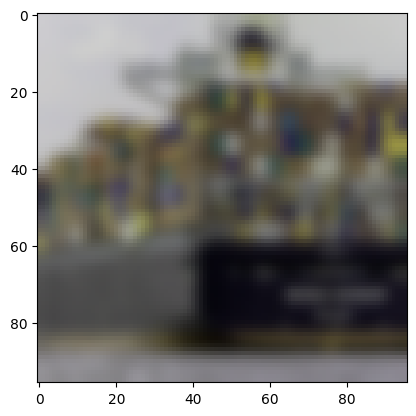

In [3]:
image, label = ship_data.__getitem__(1)

image[0] = image[0] / 2 + 0.5
plt.imshow(image[0].permute(1, 2, 0))
plt.show()

+ __getitem__() -> data/ship_data/train/ContainerShip/2998783.jpg
+ Transforming image
+ __getitem__() -> data/ship_data/train/ContainerShip/2855161.jpg
+ Transforming image
+ __getitem__() -> data/ship_data/train/Ferry/3014328.jpg
+ Transforming image
+ __getitem__() -> data/ship_data/train/Ferry/2906693.jpg
+ Transforming image
+ __getitem__() -> data/ship_data/train/Trawler-FishingVessel/1947947.jpg
+ Transforming image
+ __getitem__() -> data/ship_data/train/Trawler-FishingVessel/232547.jpg
+ Transforming image


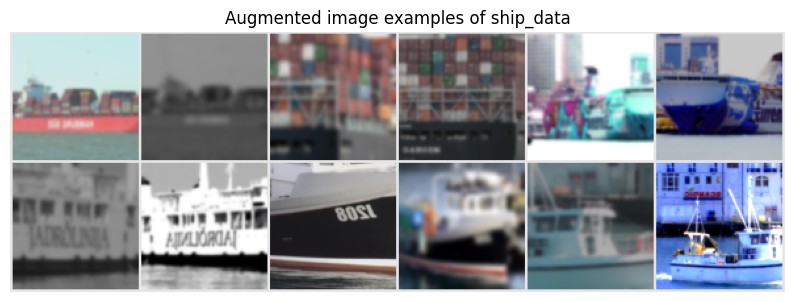

In [9]:
NUM_IMAGES = 6

imgs = torch.stack([img for idx in range(NUM_IMAGES) for img in ship_data[idx][0]], dim=0)
img_grid = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(10,5))
plt.title('Augmented image examples of ship_data')
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

In [5]:
print(len(ship_data))

126
